# EVALUATING THE SOURCE MODEL (BINARY CLASSIFICATION) ON THE VALIDATION DATA

## Importing Python Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

print("Import Completed")

Import Completed


## Importing the Source Model (SM) Validation Data csv Files

In [2]:
# Importing the Source Model (SM) Validation Data Input csv File

sm_validation_X = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhyauk6/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_validation_final_input_X.csv")

print("Data Export Completed")

Data Export Completed


In [3]:
# Importing the Source Model (SM) Validation Data Output csv File

sm_validation_y = pd.read_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhyauk6/QMUL_MSc_Project/credit_risk_scoring_project/data/source_model_final_data/sm_validation_final_output_y.csv")

print("Data Export Completed")

Data Export Completed


## Source Model (SM) Validation Input Data Exploration

In [4]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [5]:
# Checking the size of the dataset

sm_validation_X.shape

(83885, 75)

In [6]:
# Checking the first 3 column names of the dataset

sm_validation_X.columns[[0, 1, 2]]

Index(['Unnamed: 0', 'pub_rec:0', 'pub_record:non_zero'], dtype='object')

In [7]:
# Removing the first index column from the dataset

sm_validation_X.drop(sm_validation_X.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [8]:
# Re-checking the size of the dataset after removing the index column

sm_validation_X.shape

(83885, 74)

In [9]:
# Displying the first 5 data instances of the dataframe

sm_validation_X.head()

,pub_rec:0,pub_record:non_zero,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:greater_than_1,num_tl_120dpd_2m:0,num_tl_120dpd_2m:non_zero,pub_rec_bankruptcies:0,pub_rec_bankruptcies:non_zero,num_tl_90g_dpd_24m:0,num_tl_90g_dpd_24m:non_zero,num_accts_ever_120_pd:0,num_accts_ever_120_pd:_non_zero,acc_now_delinq:0,acc_now_delinq:non_zero,num_tl_30dpd:0,num_tl_30dpd:non_zero,total_rec_late_fee:0,total_rec_late_fee:non_zero,num_rev_tl_bal_gt_0:0,num_rev_tl_bal_gt_0:1_to_5,num_rev_tl_bal_gt_0:greater_than_5,percent_bc_gt_75:0,percent_bc_gt_75:1_to_75,percent_bc_gt_75:greater_than_75,revol_util:0,revol_util:1_to_30,revol_util:31_to_60,revol_util:greater_than_60,il_util:0,il_util:1_to_40,il_util:greater_than_40,max_bal_bc:0,max_bal_bc:1_to_5000,max_bal_bc:5001_to_10000,max_bal_bc:greater_than_10000,mo_sin_old_rev_tl_op:less_than_6months,mo_sin_old_rev_tl_op:7months_to_24months,mo_sin_old_rev_tl_op:greater_than_24months,months_since_earliest_cr_line:less_than_78months,months_since_earliest_cr_line:79months_to_96months,months_since_earliest_cr_line:greater_than_96months,open_acc:less_than_5,open_acc:6_to_8,open_acc:greater_than_8,num_sats:0_to_5,num_sats:6_to_8,num_sats:greater_than_8,mort_acc:0,mort_acc:1_to_3,mort_acc:greater_than_3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:greater_than_1,open_il_12m:_0,open_il_12m:_1,open_il_12m:greater_than_1,num_tl_op_past_12m:0,num_tl_op_past_12m:1,num_tl_op_past_12m:2,num_tl_op_past_12m:3,num_tl_op_past_12m:greater_than_3,annual_inc:0_to_25000,annual_inc:25001_to_50000,annual_inc:50001_to_75000,annual_inc:75001_to_100000,annual_inc:greater_than_100001,dti:0_to_36,dti:greater_than_36,emp_length_int:less_than_0,emp_length_int:1_to_2,emp_length_int:3_to_5,emp_length_int:6_to_9,emp_length_int:greater_than_9
0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
1,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0
4,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [10]:
# Displying the last 5 data instances of the dataframe

sm_validation_X.tail()

,pub_rec:0,pub_record:non_zero,delinq_2yrs:0,delinq_2yrs:1,delinq_2yrs:greater_than_1,num_tl_120dpd_2m:0,num_tl_120dpd_2m:non_zero,pub_rec_bankruptcies:0,pub_rec_bankruptcies:non_zero,num_tl_90g_dpd_24m:0,num_tl_90g_dpd_24m:non_zero,num_accts_ever_120_pd:0,num_accts_ever_120_pd:_non_zero,acc_now_delinq:0,acc_now_delinq:non_zero,num_tl_30dpd:0,num_tl_30dpd:non_zero,total_rec_late_fee:0,total_rec_late_fee:non_zero,num_rev_tl_bal_gt_0:0,num_rev_tl_bal_gt_0:1_to_5,num_rev_tl_bal_gt_0:greater_than_5,percent_bc_gt_75:0,percent_bc_gt_75:1_to_75,percent_bc_gt_75:greater_than_75,revol_util:0,revol_util:1_to_30,revol_util:31_to_60,revol_util:greater_than_60,il_util:0,il_util:1_to_40,il_util:greater_than_40,max_bal_bc:0,max_bal_bc:1_to_5000,max_bal_bc:5001_to_10000,max_bal_bc:greater_than_10000,mo_sin_old_rev_tl_op:less_than_6months,mo_sin_old_rev_tl_op:7months_to_24months,mo_sin_old_rev_tl_op:greater_than_24months,months_since_earliest_cr_line:less_than_78months,months_since_earliest_cr_line:79months_to_96months,months_since_earliest_cr_line:greater_than_96months,open_acc:less_than_5,open_acc:6_to_8,open_acc:greater_than_8,num_sats:0_to_5,num_sats:6_to_8,num_sats:greater_than_8,mort_acc:0,mort_acc:1_to_3,mort_acc:greater_than_3,inq_last_6mths:0,inq_last_6mths:1,inq_last_6mths:greater_than_1,open_il_12m:_0,open_il_12m:_1,open_il_12m:greater_than_1,num_tl_op_past_12m:0,num_tl_op_past_12m:1,num_tl_op_past_12m:2,num_tl_op_past_12m:3,num_tl_op_past_12m:greater_than_3,annual_inc:0_to_25000,annual_inc:25001_to_50000,annual_inc:50001_to_75000,annual_inc:75001_to_100000,annual_inc:greater_than_100001,dti:0_to_36,dti:greater_than_36,emp_length_int:less_than_0,emp_length_int:1_to_2,emp_length_int:3_to_5,emp_length_int:6_to_9,emp_length_int:greater_than_9
83880,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
83881,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
83882,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
83883,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
83884,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


## Source Model (SM) Validation Output Data Exploration

In [11]:
# Sets the pandas dataframe options to display all columns/ rows.

pd.options.display.max_columns = None
#pd.options.display.max_rows = None

print("Execution Completed")

Execution Completed


In [12]:
# Checking the size of the dataset

sm_validation_y.shape

(83885, 2)

In [13]:
# Checking the first 3 column names of the dataset

sm_validation_y.columns[[0, 1]]

Index(['Unnamed: 0', 'score_status'], dtype='object')

In [14]:
# Removing the first index column from the dataset

sm_validation_y.drop(sm_validation_y.columns[0], axis = 1, inplace = True)

print("Execution Completed")

Execution Completed


In [15]:
# Re-checking the size of the dataset after removing the index column

sm_validation_y.shape

(83885, 1)

In [16]:
# Displying the first 5 data instances of the dataframe

sm_validation_y.head()

,score_status
0,1
1,1
2,0
3,1
4,1


In [17]:
# Displying the last 5 data instances of the dataframe

sm_validation_y.tail()

,score_status
83880,1
83881,1
83882,0
83883,0
83884,1


## Loading the Pre-Trained Source Model (SM) for Classification Evaluation of "score_status"

### Source Model (SM) includes 
> ### 1 input layer with 74 neurons
> ### 4 hidden layers each with 74, 70, 66, 60 neurons respectively and each with "relu" activation function
> ### 1 output layer with a single neuron with "sigmoid" activation function for binary classification output of "score_status"

In [150]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

# Loading the Pre-Trained Source Model (SM) for Classification Evaluation of "score_status"

sm_model_path = "/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhyauk6/QMUL_MSc_Project/credit_risk_scoring_project/models/source_model/sm_adam_relu_retrain_1_1000/sm_adam_relu_retrain_1_1000_final.h5"

source_model_pre_trained = load_model(sm_model_path)

print("Source Model Loaded Successfully")

Source Model Loaded Successfully


In [151]:
# Verifying the Summary of the Model

source_model_pre_trained.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 74)                5550      
_________________________________________________________________
dense_1 (Dense)              (None, 70)                5250      
_________________________________________________________________
dense_2 (Dense)              (None, 66)                4686      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                4020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 61        
Total params: 19,567
Trainable params: 19,567
Non-trainable params: 0
_________________________________________________________________


## Source Model (SM) - Validation Evaluation - Classification - "score_status"

In [152]:
# Evaluating the Target "score_status" on the Validation Data

sm_y_pred = source_model_pre_trained.predict(sm_validation_X, batch_size=1)

print("Execution Completed")

Execution Completed


In [153]:
# Verifying the Count of Evaluation Outcomes on the Validation Data

print("Total Output Actuals on the Source Model Validation Data: ", sm_validation_y.shape[0])
print("Total Output Predictions on the Source Model Validation Data: ", len(sm_y_pred))

Total Output Actuals on the Source Model Validation Data:  83885
Total Output Predictions on the Source Model Validation Data:  83885


In [154]:
# Comparing the Actual and Prediction Results for the first 10 Validation Data Instances

print("Source Model Validation Actuals")
print(sm_validation_y[:10])

print("Source Model Validation Predictions")
print(sm_y_pred[:10])

Source Model Validation Actuals
   score_status
0             1
1             1
2             0
3             1
4             1
5             0
6             0
7             1
8             1
9             0
Source Model Validation Predictions
[[0.5499343 ]
 [0.658738  ]
 [0.31825748]
 [0.7927182 ]
 [0.60184336]
 [0.49626717]
 [0.66112095]
 [0.34477127]
 [0.39118445]
 [0.26325   ]]


## Source Model (SM) - Actuals versus Predictions Comparison

### Converting the Probability Predictions of the "score_status" into a Binary Value Representation of 0 and 1

In [155]:
# Converting probability predictions numpy array into a dataframe

sm_y_pred_df = pd.DataFrame(sm_y_pred, columns=['Score_Status_Probability_Prediction'])
sm_y_pred_df.head()

,Score_Status_Probability_Prediction
0,0.549934
1,0.658738
2,0.318257
3,0.792718
4,0.601843


In [156]:
sm_y_pred_df['Score_Status_Class_Prediction'] = np.where( sm_y_pred_df['Score_Status_Probability_Prediction'] >= 0.5, 1, 0)

print("Missing Values in the New Column 'Score_Status_Class_Prediction':", sm_y_pred_df['Score_Status_Class_Prediction'].isna().sum())

print("\n")

# Displaying a sample of 10 random actuals and its respective predictions
sm_y_pred_df.sample(10)

Missing Values in the New Column 'Score_Status_Probability_Prediction': 0




,Score_Status_Probability_Prediction,Score_Status_Class_Prediction
47344,0.660183,1
44243,0.523797,1
17383,0.485674,0
35254,0.687270,1
31765,0.681797,1
52901,0.228441,0
29486,0.348625,0
59599,0.015675,0
55608,0.366943,0
23760,0.505655,1


In [157]:
# Verifying the Size and the Missing Values (if any) Count of the Score Status Actual (Ground-Truth) Dataframe and the Predictions Dataframe

print(sm_validation_y.shape)
print(sm_y_pred_df.shape)

print("\n")

print(sm_validation_y.isna().sum())
print(sm_y_pred_df.isna().sum())


(83885, 1)
(83885, 2)


score_status    0
dtype: int64
Score_Status_Probability_Prediction    0
Score_Status_Class_Prediction          0
dtype: int64


In [158]:
# Concatenating the Score Status Actual (Ground-Truth) Dataframe and the Predictions Dataframe

frames = [sm_validation_y, sm_y_pred_df]

sm_results = pd.concat(frames, axis=1)

# Renaming the "score_status" Column Name
sm_results.rename(columns = {'score_status':'Score_Status_Class_Actual'}, inplace = True)

# Displaying a sample of 10 random results
sm_results.sample(10)


,Score_Status_Class_Actual,Score_Status_Probability_Prediction,Score_Status_Class_Prediction
34005,1,0.843687,1
33767,1,0.753855,1
59318,0,0.337930,0
39447,1,0.823335,1
10844,1,0.579348,1
82843,0,0.299689,0
36709,0,0.260425,0
55078,1,0.318255,0
75768,1,0.361668,0
50299,1,0.327567,0


## Source Model (SM) - Exporting a Copy of the "score_status" Output Predictions

In [159]:
# Exporting a copy of Score Status Actuals and Predictions DataFrame as a csv file

sm_results.to_csv("/Users/vidhyalakshmiparthasarathy/.CMVolumes/Google-Drive-pbvidhya/QMUL_MSc_Project/credit_risk_scoring_project/output/sm_validation_results/sm_validation_results_epochs_1000_optim.csv")

print("Data Export Completed")

Data Export Completed


## Source Model - Metrics Report

In [160]:
# Source Model - Classificatio Report 

from sklearn.metrics import confusion_matrix, classification_report

sm_classification_report = classification_report(sm_results['Score_Status_Class_Actual'], sm_results['Score_Status_Class_Prediction'])

print(sm_classification_report)

              precision    recall  f1-score   support

           0       0.45      0.56      0.50     27409
           1       0.76      0.67      0.71     56476

    accuracy                           0.64     83885
   macro avg       0.61      0.62      0.61     83885
weighted avg       0.66      0.64      0.64     83885



Text(51.0, 0.5, 'Truth')

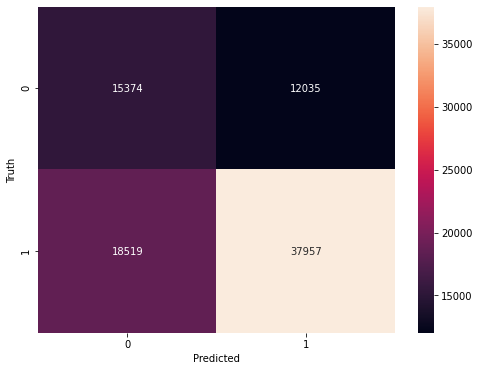

In [161]:
# Source Model - Confusion Matrix

import tensorflow as tf
import seaborn as sn

sm_cm = tf.math.confusion_matrix(labels=sm_results['Score_Status_Class_Actual'], predictions=sm_results['Score_Status_Class_Prediction'])

plt.figure(figsize = (8, 6))
sn.heatmap(sm_cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [162]:
# Source Model - ROC, AUC

from sklearn.metrics import roc_auc_score

sm_auc = roc_auc_score(sm_results['Score_Status_Class_Actual'], sm_results['Score_Status_Class_Prediction'])

print("Source Model ROC AUC: ", sm_auc)

Source Model ROC AUC:  1.0
